In [74]:
!pip install seaborn

### Pandas Task

<img src="./images/happiness_report_2023.png" width="600" style="margin-left:0">

In [45]:
import pandas as pd

# 자료 파일 불러옴
h_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(h_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [9]:
# 자료 정보
h_df.info()

# 자료형
h_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [10]:
# 숫자형 컬럼에 대한 정보 계산(개수, 평균, 표준편차, 최솟값, 하위25%, 중앙값, 상위 25%, 최댓값)
h_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [21]:
import numpy as np
from scipy.stats import iqr

# 하위 25%
h_df_Q1 = np.percentile(h_df.happiness_score, 25)
# 상위 25%
h_df_Q3 = np.percentile(h_df.happiness_score, 75)
# print(h_df_Q1, h_df_Q3)

# iqr: 정상치 범위
# 1.
# iqr_value = h_df_Q3 - h_df_Q1
# print(iqr_value)
# 2. 
iqr_value = iqr(h_df.happiness_score)
print(iqr_value)

lower_bound = h_df_Q1 - 1.5 * iqr_value
upper_bound = h_df_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

1.6099999999999994
정상치 범위: 2.309000000000001 ~ 8.748999999999999


In [22]:
# 정상치 범위 내의 정보만 출력
condition1 = h_df.happiness_score >= lower_bound
condition2 = h_df.happiness_score <= upper_bound
condition = condition1 & condition2

h_df_condition = h_df[condition]
h_df_condition

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [25]:
# 누락된 데이터(NaN) 확인(.isna(): NaN을 True로 함)하여 그 개수를 합산(.sum())
h_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [27]:
# 중복값이 있는지 확인하여 개수를 합산
h_df.duplicated().sum()

np.int64(0)

In [52]:
display(h_df[['gdp_per_capita']].describe().T)
# 1인당 국내총생산(GDP)에 따른 행복지수의 차이 -> 영향 있는 듯?

print(h_df[h_df['gdp_per_capita'] < 1.5]['happiness_score'].mean())
print(h_df[h_df['gdp_per_capita'] > 1.5]['happiness_score'].mean())


,count,mean,std,min,25%,50%,75%,max
gdp_per_capita,137.0,1.406985,0.432963,0.0,1.099,1.449,1.798,2.2


4.810922077922077
6.475183333333333


In [55]:
display(h_df[['freedom_to_make_life_choices']].describe().T)
# 삶의 선택에 있어 자유로움의 척도에 따른 행복지수

print(h_df[h_df['freedom_to_make_life_choices'] < 0.55]['happiness_score'].mean())
print(h_df[h_df['freedom_to_make_life_choices'] > 0.55]['happiness_score'].mean())


,count,mean,std,min,25%,50%,75%,max
freedom_to_make_life_choices,137.0,0.54,0.149501,0.0,0.455,0.557,0.656,0.772


4.80803125
6.181342465753425


In [59]:
h_df['freedom_to_make_life_choices'].duplicated().sum()

np.int64(21)

In [62]:
h_mean_df = h_df.groupby('freedom_to_make_life_choices').mean('happiness_score').reset_index()
h_mean_df

,freedom_to_make_life_choices,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,generosity,perceptions_of_corruption
0,0.000,1.859,0.645,0.000,0.087,0.093,0.059
1,0.117,3.545,0.914,0.327,0.215,0.129,0.145
2,0.123,2.392,1.417,0.476,0.398,0.061,0.027
3,0.125,4.614,1.714,1.148,0.467,0.095,0.096
4,0.187,4.019,0.632,0.779,0.178,0.177,0.134
...,...,...,...,...,...,...,...
111,0.748,6.173,1.883,1.269,0.389,0.199,0.138
112,0.752,7.315,1.994,1.521,0.544,0.212,0.463
113,0.754,7.395,1.921,1.510,0.562,0.225,0.520
114,0.768,4.393,1.025,1.024,0.283,0.176,0.051


In [72]:
display(h_df[['perceptions_of_corruption']].describe().T)

print(h_df[h_df['perceptions_of_corruption'] > 0.1]['happiness_score'].mean())
print(h_df[h_df['perceptions_of_corruption'] < 0.1]['happiness_score'].mean())


,count,mean,std,min,25%,50%,75%,max
perceptions_of_corruption,137.0,0.145898,0.126723,0.0,0.06,0.111,0.187,0.561


5.794133333333334
5.232129032258064


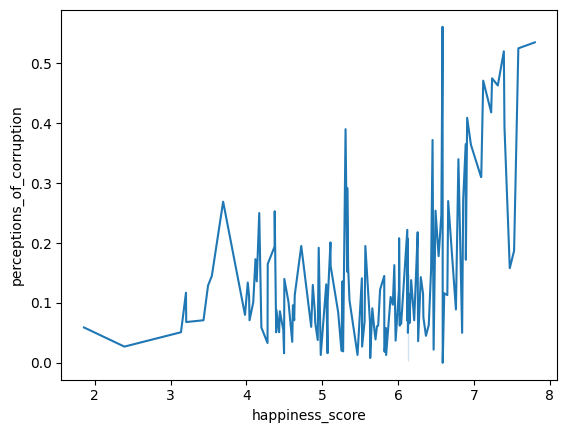

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

line = sns.lineplot(data=h_df, x='happiness_score', y='perceptions_of_corruption')


In [79]:
h_group_df = h_df.groupby('region')['happiness_score'].std().reset_index()
display(h_group_df)

h_mean_df = h_df.groupby('region')['happiness_score'].mean().reset_index()
display(h_mean_df)

,region,happiness_score
0,Central and Eastern Europe,0.559300
1,Commonwealth of Independent States,0.357055
2,East Asia,0.403384
3,Latin America and Caribbean,0.381950
4,Middle East and North Africa,1.263875
5,North America and ANZ,0.108902
6,South Asia,1.180692
7,Southeast Asia,0.732066
8,Sub-Saharan Africa,0.675345
9,Western Europe,0.557576


,region,happiness_score
0,Central and Eastern Europe,5.967091
1,Commonwealth of Independent States,5.828250
2,East Asia,5.930167
3,Latin America and Caribbean,5.966053
4,Middle East and North Africa,5.102143
5,North America and ANZ,7.018250
6,South Asia,4.089000
7,Southeast Asia,5.431222
8,Sub-Saharan Africa,4.382485
9,Western Europe,6.894350


In [83]:
h_df.groupby('region')['happiness_score'].describe().T.reset_index()


region,index,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
0,count,22.000000,4.000000,6.000000,19.000000,14.000000,4.000000,6.000000,9.000000,33.000000,20.000000
1,mean,5.967091,5.828250,5.930167,5.966053,5.102143,7.018250,4.089000,5.431222,4.382485,6.894350
2,std,0.559300,0.357055,0.403384,0.381950,1.263875,0.108902,1.180692,0.732066,0.675345,0.557576
3,min,5.071000,5.330000,5.308000,5.211000,2.392000,6.894000,1.859000,4.372000,3.138000,5.931000
4,25%,5.507750,5.701250,5.823500,5.657000,4.526250,6.944250,4.097500,5.111000,4.019000,6.428250
5,50%,6.083000,5.919500,5.895500,6.024000,4.905500,7.028000,4.362000,5.523000,4.432000,6.901500
6,75%,6.433250,6.046500,6.084500,6.262000,5.962000,7.102000,4.526750,5.843000,4.954000,7.335000
7,max,6.845000,6.144000,6.535000,6.609000,7.473000,7.123000,5.360000,6.587000,5.902000,7.804000


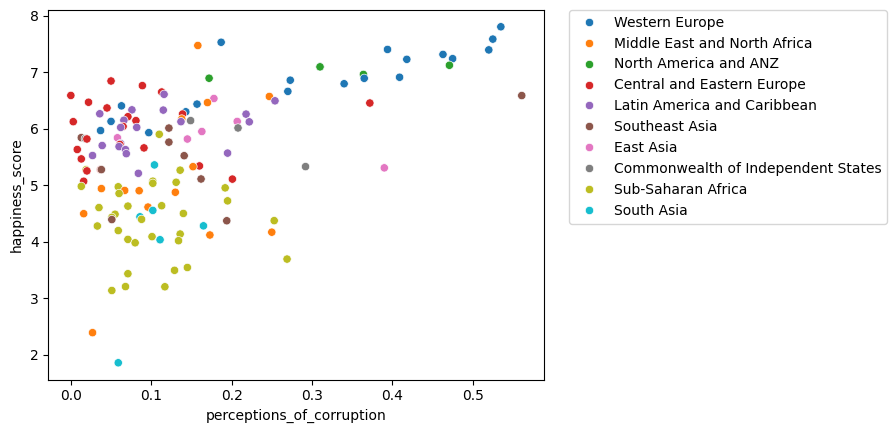

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='perceptions_of_corruption', y='happiness_score', data=h_df, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

### 2023년도 지역별 행복지수 보고서

- "Western Europe" (서유럽) 지역의 행복점수 표준편차는 0.452이다.
이는 해당 지역 내의 행복 점수들이 평균으로부터 약 0.45만큼 퍼져 있음을 의미하며,
이 지역의 국가들은 평균적으로 비교적 비슷한 수준의 행복을 느끼고 있음을 나타낸다.

- "North America and ANZ" (북미·오세아니아) 지역의 행복점수 표준편차는 0.310이다.
이 그룹은 가장 낮은 변동성을 보이며,
행복 점수들이 평균값 주변에 밀집되어 있는 것을 의미한다.

- "Central and Eastern Europe" (중앙·동유럽) 지역의 행복점수 표준편차는 0.613으로,
앞선 두 지역보다 더 큰 변동성을 보인다.
이는 이 지역 내의 행복 점수들이 평균으로부터 더 넓게 퍼져 있음을 나타낸다.

- "Latin America and Caribbean" (라틴아메리카·카리브) 지역의 행복점수 표준편차는 0.698이다.
이는 중간 수준 이상의 변동성을 보여,
행복 점수들이 지역 내에서 다소 다양하게 분포되어 있음을 의미한다.

- "East Asia" (동아시아) 지역의 행복점수 표준편차는 0.604이다.
이 그룹의 행복 점수는 일정 부분 차이를 보이며,
평균으로부터 다소 넓게 퍼져 있다.

- "Southeast Asia" (동남아시아) 지역의 행복점수 표준편차는 0.523이다.
이는 비교적 안정적인 분포를 보여,
이 지역의 행복 점수는 평균값에 가까운 수준에서 분포하고 있음을 시사한다.

- "Sub-Saharan Africa" (사하라 이남 아프리카) 지역의 행복점수 표준편차는 0.937로,
가장 큰 변동성을 보인다.
이는 해당 지역의 행복 점수들이 매우 다양하게 퍼져 있음을 나타낸다.

- "Middle East and North Africa" (중동 및 북아프리카) 지역의 행복점수 표준편차는 0.812이다.
이는 비교적 큰 편차로,
이 지역 내에서 행복 점수의 분포가 다양함을 보여준다.

- "Commonwealth of Independent States" (독립국가연합) 지역의 행복점수 표준편차는 0.702이다.
이는 중간 수준의 변동성을 나타내며,
이 그룹의 행복 점수들이 일정 부분 흩어져 있음을 의미한다.

- "South Asia" (남아시아) 지역의 행복점수 표준편차는 0.715이다.
이는 비교적 큰 변동성을 보이며,
행복 점수들이 평균으로부터 넓게 분포되어 있음을 시사한다.

#### 📌 요약하자면,
표준편차가 낮은 지역일수록 행복 점수의 분포가 평균에 가깝고,
표준편차가 높은 지역일수록 행복 점수의 차이가 크다.

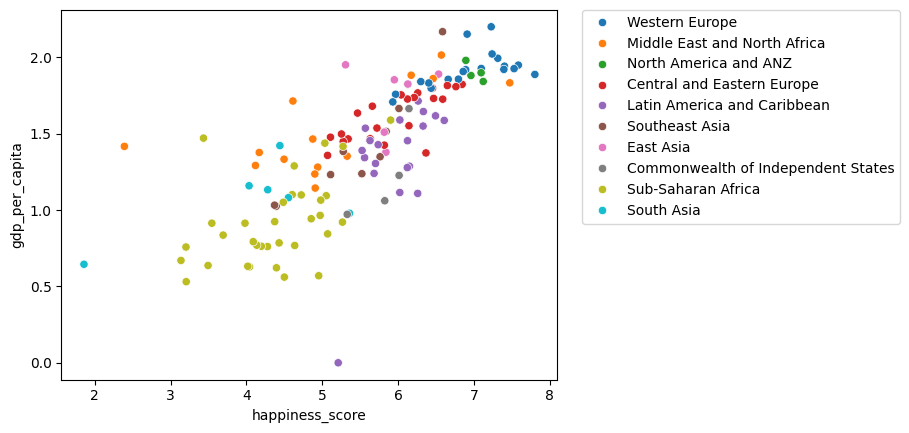

In [106]:
sns.scatterplot(x='happiness_score', y='gdp_per_capita', data=h_df, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()
